In [50]:
import os, pandas as pd, numpy as np

In [51]:
os.chdir("/Users/janybalashiva/Downloads")

In [52]:
Data=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [53]:
Data.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [54]:
OD = Data[Data['state_1']=="OD"]

In [55]:
OD.isnull().sum().sort_values(ascending = False)

slno             0.0
grp              0.0
pulsep_v         0.0
besan_v          0.0
gramp_v          0.0
                ... 
edibletotal_q    0.0
edioilothr_q     0.0
cocooil_q        0.0
gnoil_q          0.0
fv_tot           0.0
Length: 384, dtype: float64

In [56]:
Data.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [57]:
OD_new = OD[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [58]:
OD_new.isnull().sum().sort_values(ascending = False)

state_1             0.0
District            0.0
Sector              0.0
Region              0.0
State_Region        0.0
ricetotal_q         0.0
wheattotal_q        0.0
moong_q             0.0
Milktotal_q         0.0
chicken_q           0.0
bread_q             0.0
foodtotal_q         0.0
Beveragestotal_v    0.0
Meals_At_Home       0.0
dtype: float64

In [59]:
OD_clean =OD_new.copy()

In [60]:
OD_clean.loc[:, 'Meals_At_Home'] = OD_clean['Meals_At_Home'].fillna(OD_new['Meals_At_Home'].mean())

In [61]:
OD_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [62]:
# Outlier Checking

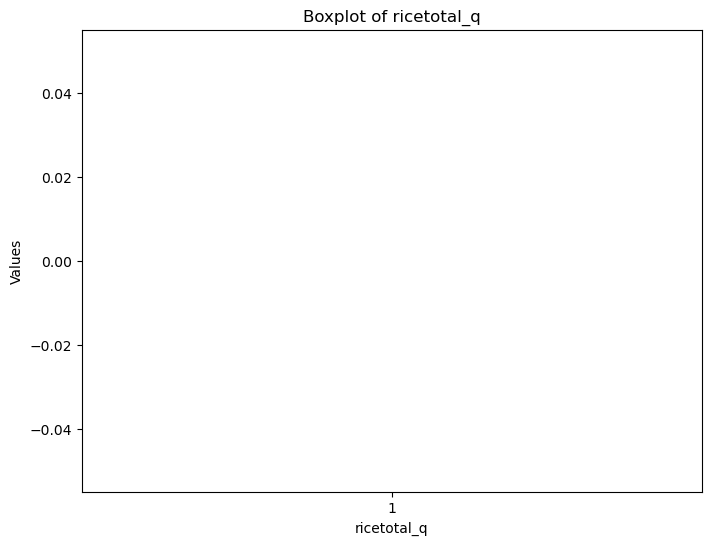

In [86]:
import matplotlib.pyplot as plt
# Assuming HR_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(OD_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [64]:
rice1 = OD_clean['ricetotal_q'].quantile(0.25)
rice2 = OD_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [65]:
OD_clean=OD_new[(OD_new['ricetotal_q']<=up_limit)&(OD_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x283f8bd50>,
 'caps': [<matplotlib.lines.Line2D at 0x283f95210>,
 'boxes': [<matplotlib.lines.Line2D at 0x283f8b4d0>],
 'medians': [<matplotlib.lines.Line2D at 0x283f96290>],
 'fliers': [<matplotlib.lines.Line2D at 0x283f96b10>],
 'means': []}

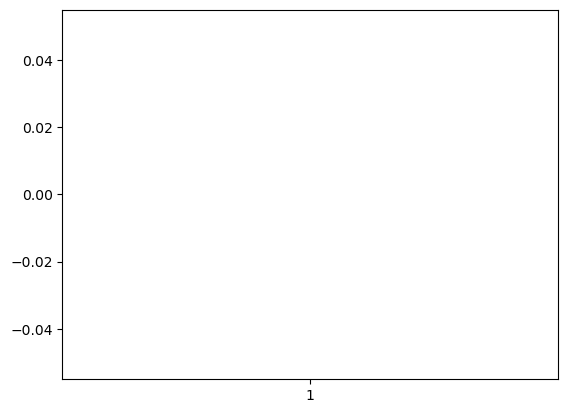

In [66]:
plt.boxplot(OD_clean['ricetotal_q'])

In [67]:
OD_clean['District'].unique()

array([], dtype=int64)

In [68]:
# Replace values in the 'Sector' column
OD_clean.loc[:,'Sector'] = OD_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [69]:
#total consumption

In [70]:
OD_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [71]:
OD_clean.loc[:, 'total_consumption'] = OD_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [72]:
OD_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption


In [73]:
OD_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

Empty DataFrame
Columns: [(total_consumption, std), (total_consumption, mean), (total_consumption, max), (total_consumption, min)]
Index: []

In [74]:
OD_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

Empty DataFrame
Columns: [(total_consumption, std), (total_consumption, mean), (total_consumption, max), (total_consumption, min)]
Index: []

In [75]:
total_consumption_by_districtcode=OD_clean.groupby('District')['total_consumption'].sum()

In [76]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

Series([], Name: total_consumption, dtype: float64)

In [77]:
OD_clean.loc[:,"District"] = OD_clean.loc[:,"District"].replace({15: "anugul", 11: "jagatsinghapur", 3: "sambalpur"})

In [78]:
total_consumption_by_districtname=OD_clean.groupby('District')['total_consumption'].sum()

In [79]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

Series([], Name: total_consumption, dtype: float64)

In [80]:
from statsmodels.stats import weightstats as stests

In [81]:
rural=OD_clean[OD_clean['Sector']=="RURAL"]
urban=OD_clean[OD_clean['Sector']=="URBAN"]

In [82]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption


In [83]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption


In [84]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [85]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:1545: RuntimeWarning: Mean of empty slice.
  x1_mean = x1.mean(0)
/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:1546: RuntimeWarning: Degrees of freedom <= 0 for slice
  x1_var = x1.var(0)
/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/janybalashiva/anaconda3/lib/python3.11/site-packages/statsmodels/stats/weightstats.py:1550: RuntimeWar

ZeroDivisionError: float division by zero